# EE5377 - Introduction to Image Processing

Homework-1

## Imports

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import cv2
import random
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Images

Images used in this Assignment aare GrayScale. Images are downloaded from 
1. University of Southern California’s image database at http://sipi.usc.edu/database/database.php?volume=misc.
2. free images from NASA’s site: http://apod.nasa.gov/apod/archivepix.html


## Binary Morphology

1. Plotting Histogram of Image and using it to Quantise Image Pixels into 2 levels.
2. Implementing Connected Component Algorithm
3. Removal of Minor Blobs in Images
4. Implementation of functions like DILATE, ERODE, MEDIAN, OPEN, CLOSE, OPEN-CLOS and CLOS-OPEN
5. Verifying Properties like
    1. **DILATE is the dual of ERODE with respect to complementation.**
    2. **ERODE is the dual of DILATE with respect to complementation.**
    3. **MEDIAN is its own dual with respect to complementation.**

### Reading and Displaying Image

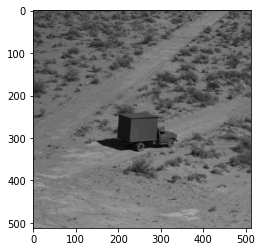

In [2]:
img1 = pimg.imread('Images/7.1.01.tiff')
plt.imshow(img1,cmap='gray')
plt.show()

### Generating Histogram of Image which represents the Frequency of each Pixel Value

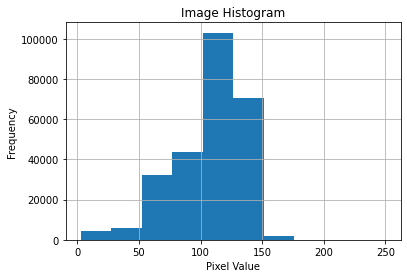

In [3]:
def ImageHistogram(img):
    plt.title('Image Histogram')
    plt.hist(img.flatten())
    plt.grid()
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

ImageHistogram(img1)

### Frequency of each Pixel Value.

In [4]:
Freq = np.bincount(img1.flatten())

### Setting Threshold to Quantise Image to 2 Levels
Threshold is adjusted as $\frac{\text{2MaxFreqPixel}}{3}$

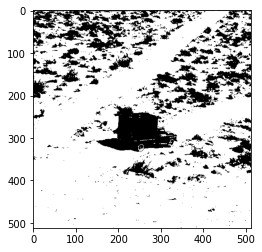

In [5]:
MaxFreqPixel = np.argmax(Freq)
binimage = np.where(img1 < MaxFreqPixel/1.5, 0, 255)/255
plt.imshow(binimage,cmap='gray')
plt.show()

### Connected Component Algorithm

Any set of pixels which is not separated by a boundary is call connected. Each maximal region of connected pixels is called a **Connected-Component**. Connected-Component labeling, Connected-Component analysis, blob extraction, region labeling, blob discovery, or region extraction is an algorithmic application of graph theory, where subsets of connected components are uniquely labeled based on a given heuristic

In [6]:
def CCA(I):
    R = np.zeros(I.shape)
    k = 1
    for i in range(1,I.shape[0]):
        for j in range(1,I.shape[1]):
            if (I[i][j] == 0 and I[i-1][j] == 1 and I[i][j-1] == 1):
                R[i][j] = k
                k += 1
            elif (I[i][j] == 0 and I[i-1][j] == 0 and I[i][j-1] == 1):
                R[i][j] = R[i-1][j]
            elif (I[i][j] == 0 and I[i-1][j] == 1 and I[i][j-1] == 0):
                R[i][j] = R[i][j-1]
            elif (I[i][j]==0 and I[i-1][j] == 0 and I[i][j-1] == 0):
                R[i][j] = min(R[i][j-1], R[i-1][j])
                if R[i][j-1] != R[i-1][j-1]:
                    R[i][j-1] = R[i][j]
                    R[i-1][j] = R[i][j]
            
    return R.astype(int)

### Blobs of Image

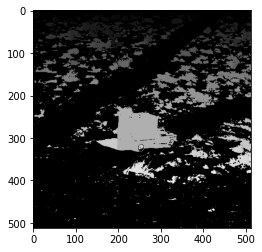

In [7]:
CCAimg = CCA(binimage)
plt.imshow(CCAimg,cmap='gray')

### Major Blob

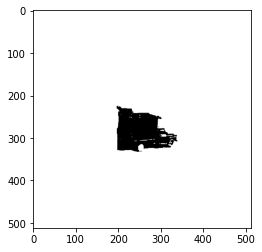

In [8]:
CCA = np.where(CCAimg == 1+np.argmax(np.bincount(CCAimg.flatten())[1:]), 0, 1)
plt.imshow(CCA,cmap = 'gray')
plt.show()

binaryImage = CCA
binaryImageC = np.where(binaryImage==0, 1, 0)

### Windows

In [9]:
def Windows(Type,p):
    Filter = []
    p = int(np.floor(p/2))
    moves = list(np.arange(-p,p+1,1))
    
    if Type == "CROSS":
        for m in moves:
            Filter.append((0,m))
            if m!=0:
                Filter.append((m,0))
        
        
    if Type == "SQUARE":
        for x in moves:
            for y in moves:
                Filter.append((x,y))
    
    return Filter

### Dilation of Binary Image

In [10]:
def dilate(I,B):
    J = np.zeros(I.shape)
    I = I.astype(int)
    
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            var = 0
            for k in range(len(B)):
                if (i+B[k][0] < I.shape[0] and i+B[k][0] >= 0 and j+B[k][1] < I.shape[1] and j+B[k][1] >= 0):
                    var = var or I[i+B[k][0]][j+B[k][1]]
            J[i][j] = var  
    
    return J       

### Erosion of Binary Image

In [11]:
def erode(I,B):
    J = np.zeros(I.shape)
    I = I.astype(int)
    
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            var = 1
            for k in range(len(B)):
                if (i+B[k][0] < I.shape[0] and i+B[k][0] >= 0 and j+B[k][1] < I.shape[1] and j+B[k][1] >= 0):
                    var = var and I[i+B[k][0]][j+B[k][1]]
            J[i][j] = var  
    
    return J       

### Median Operator over Binary Image

In [12]:
def median(I,B):
    J = np.zeros(I.shape)
    I = I.astype(int)
    
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            var = []
            for k in range(len(B)):
                if (i+B[k][0] < I.shape[0] and i+B[k][0] >= 0 and j+B[k][1] < I.shape[1] and j+B[k][1] >= 0):
                    var.append(I[i+B[k][0]][j+B[k][1]])
            J[i][j] = np.median(var) 
    
    return J       

### Dilation and Erosion for Binary Image

In [13]:
DilatedImage = dilate(binaryImage,Windows("SQUARE",3))
ErodedImage = erode(binaryImage,Windows("SQUARE",3))

### Dilation and Erosion for Complementory of Binary Image

In [14]:
DilatedImageC = dilate(binaryImageC,Windows("SQUARE",3))
ErodedImageC = erode(binaryImageC,Windows("SQUARE",3))

### DILATE is the dual of ERODE with respect to complementation

'$\ominus$' symbol indicates Erosion \
'$\oplus$' symbol indicates Dilation

$ A \oplus B = (A^{c} \ominus B)^{c}$

In [15]:
LHS = DilatedImage
RHS = np.where(ErodedImageC == 0, 1, 0)

np.array_equal(LHS, RHS)

True

### ERODE is the dual of DILATE with respect to complementation

'$\ominus$' symbol indicates Erosion \
'$\oplus$' symbol indicates Dilation

$ A \ominus B = (A^{c} \oplus B)^{c}$

In [16]:
LHS = ErodedImage
RHS = np.where(DilatedImageC == 0, 1, 0)

np.array_equal(LHS, RHS)

True

### MEDIAN is its own dual with respect to complementation.

In [17]:
MedianedImage = median(binaryImage,Windows("SQUARE",3))
MedianedImageC = median(binaryImageC,Windows("SQUARE",3))

LHS = MedianedImage
RHS = np.where(MedianedImageC==0,1,0)

np.array_equal(LHS,RHS)

True

## Gray scale Operations

### Reading Image

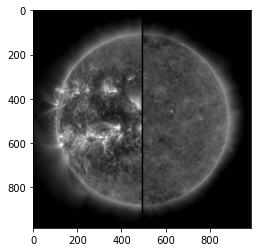

In [18]:
img2 = cv2.imread('Images/ig_maxmin.jpg')
img2 = cv2.cvtColor(np.array(img2),cv2.COLOR_BGR2GRAY)
I = img2.astype(np.uint16)
plt.imshow(img2,cmap='gray')
plt.show()

### Histogram Values

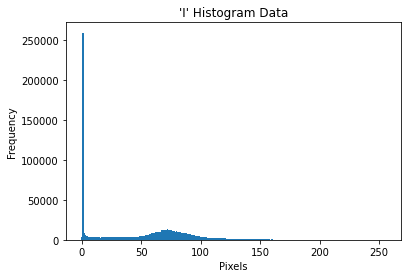

In [19]:
b = np.arange(-0.5,256.5,1)
I_Hist = np.bincount(img2.flatten())

plt.title("'I' Histogram Data")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.hist(img2.flatten(),bins=b)
plt.show()

### Simple Point Operations

#### J = P.I

For $P>1$, we can observe a spread in the Histogram and there is change of Histogram Values at edges.

For $P<1$, we can observe a shrink in the Histogram and there is change of Histogram Values at edges.

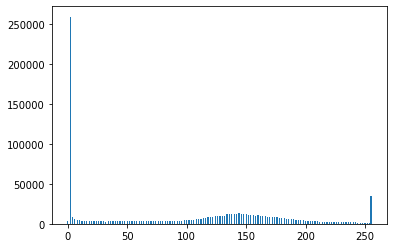

True


In [20]:
# P > 1
# Assuming P = 2

P = 2
I = I.astype(int)
J = P*I
J = np.clip(J,0,255).astype(int)

J_Hist = np.bincount(J.flatten())
plt.hist(J.flatten(),bins=b)
plt.show()

Check = True
for i in range(I_Hist.shape[0]):
    if i%P == 0:
        Check = Check and J_Hist[i] == I_Hist[int(i/P)]

print (Check)

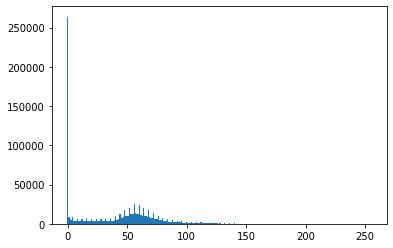

False


In [21]:
# P < 1
# Assuming P = 0.5

P = 0.8
I = I.astype(float)
J = (P * I).astype(int)
J = np.clip(J,0,255).astype(int)

J_Hist = np.bincount(J.flatten())
plt.hist(J.flatten(),bins=b)
plt.show()

Check = True
for i in range(I_Hist.shape[0]):
    if (i*P == 0):
        Check = Check and (J_Hist[i] == I_Hist[int(i/P)])

print (Check)

#### J = I + L

For $L>0$, we can observe that the Histogram shifts to right and there is a change of Histogram Values at edges.

For $L<0$, we can observe that the Histogram shifts to left and there is a change of Histogram Values at edges.

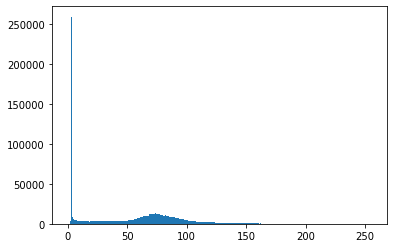

True


In [22]:
# L > 0
# Assuming L = 2, P = 1

L = 2
I = I.astype(int)
J = I + L
J = np.clip(J,0,255).astype(int)

J_Hist = np.bincount(J.flatten())
plt.hist(J.flatten(),bins=b)
plt.show()

# i < (255-L) as all pixels greater than or equal to 255-L will be merged as 255 Pixel.
Check = True
for i in range(J_Hist.shape[0]):
    if i>=L and i<255-L:
        Check = Check and J_Hist[i] == I_Hist[i-L]

print (Check)

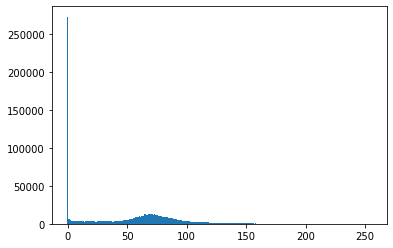

True


In [23]:
# L < 0
# Assuming L = -2, P = 1

L = -2
I = I.astype(int)
J = I + L
J = np.clip(J,0,255).astype(int)

J_Hist = np.bincount(J.flatten())
plt.hist(J.flatten(),bins=b)
plt.show()

# i > abs(L) as all pixels less than or equal to L will be merged as 0 Pixel.
Check = True
for i in range(J_Hist.shape[0]):
    if i > abs(L) and i-L<255:
        Check = Check and J_Hist[i] == I_Hist[i-L]

print (Check)

### Full Scale Contrast Stretch (FSCS)

In [24]:
A = np.min(I)
B = np.max(I)
K = 256

print ("Maximum Pixel value of Gray-Scale Image is", B)
print ("Minimum Pixel value of Gray-Scale Image is", A)

Maximum Pixel value of Gray-Scale Image is 255
Minimum Pixel value of Gray-Scale Image is 0


#### Histogram of Gray-Scale Image

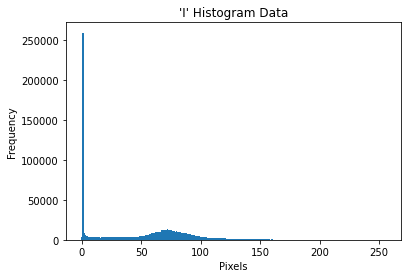

In [25]:
b = np.arange(-0.5,256.5,1)
plt.hist(I.flatten(),bins = b)
plt.title("'I' Histogram Data")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.show()

#### Calculating P and L

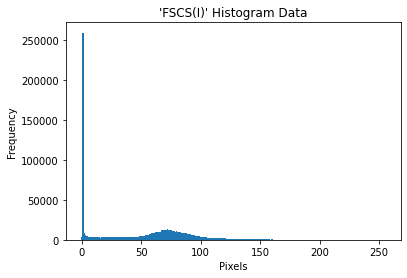

In [26]:
P = (K - 1)/(B - A)
L = -A*(K - 1)/(B - A)

FSCS_I = (P*I + A).astype(int)

b = np.arange(-0.5,256.5,1)
plt.hist(FSCS_I.flatten(),bins = b)
plt.title("'FSCS(I)' Histogram Data")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.show()

In [27]:
print ("Maximum Pixel value of Gray-Scale Image after FSCS is", np.max(FSCS_I))
print ("Minimum Pixel value of Gray-Scale Image after FSCS is", np.min(FSCS_I))

Maximum Pixel value of Gray-Scale Image after FSCS is 255
Minimum Pixel value of Gray-Scale Image after FSCS is 0


#### Plotting Images

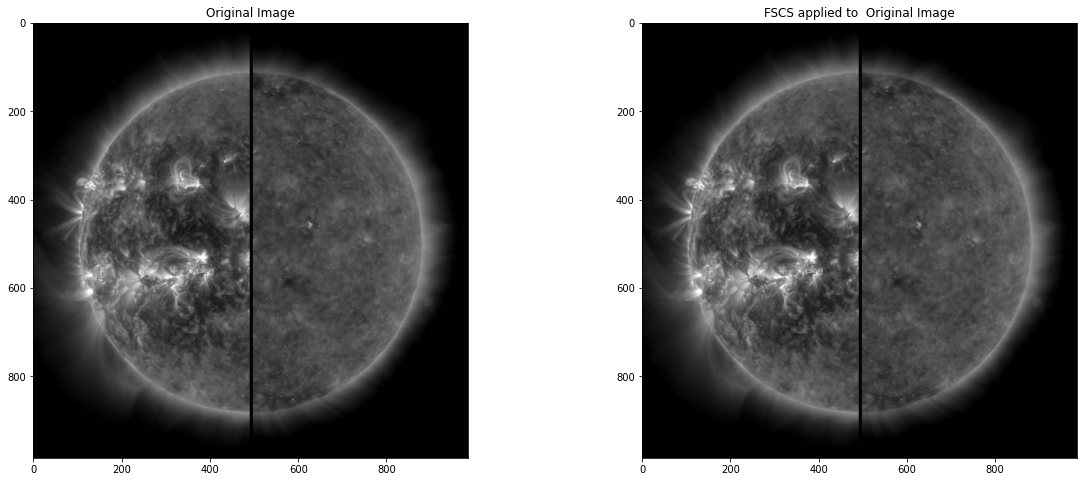

In [28]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(I,cmap='gray',vmin=0,vmax=255)

plt.subplot(1,2,2)
plt.title('FSCS applied to  Original Image')
plt.imshow(FSCS_I,cmap='gray',vmin=0,vmax=255)

plt.show()

### Log Magnitude Compression

#### Histogram of Gray-Scale Image

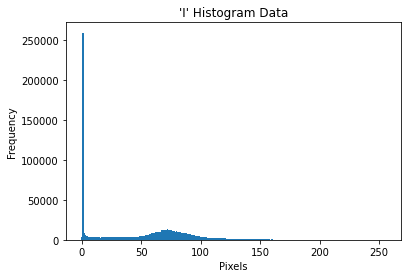

In [29]:
b = np.arange(-0.5,256.5,1)
plt.hist(I.flatten(),bins = b)
plt.title("'I' Histogram Data")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.show()

#### Histogram of Image after Log Magnitude Compression

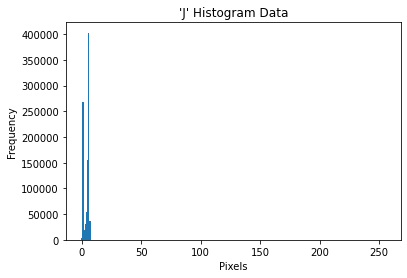

In [30]:
J = np.log2(1 + I).astype(int)
b = np.arange(-0.5,256.5,1)
plt.hist(J.flatten(),bins = b)
plt.title("'J' Histogram Data")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.show()

#### Applying FSCS to Image after Log Magnitude Compression

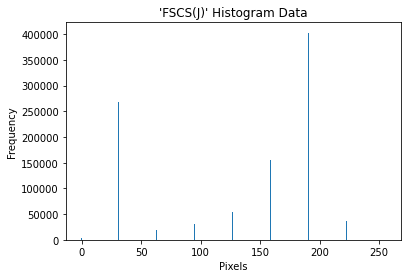

In [31]:
A = np.min(J)
B = np.max(J)
K = 256

P = (K - 1)/(B - A)
L = -A*(K - 1)/(B - A)

FSCS_J = (P*J + A).astype(int)

b = np.arange(-0.5,256.5,1)
plt.hist(FSCS_J.flatten(),bins = b)
plt.title("'FSCS(J)' Histogram Data")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.show()

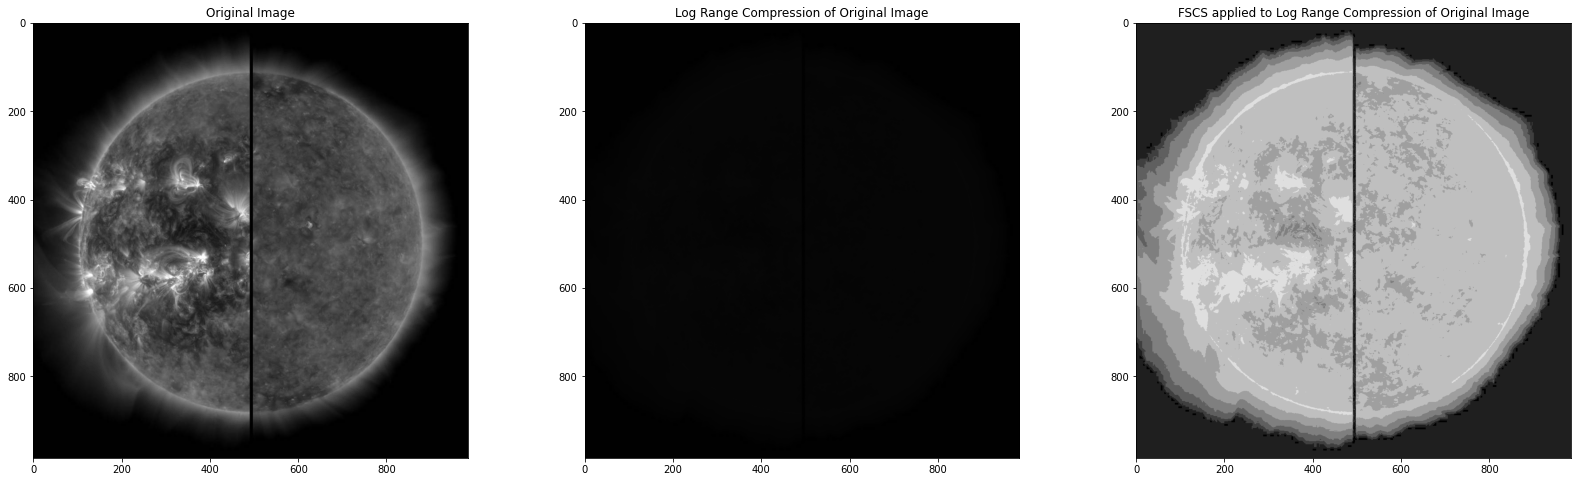

In [32]:
plt.figure(figsize=(28,8))

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(I,cmap='gray',vmin=0,vmax=255)

plt.subplot(1,3,2)
plt.title('Log Range Compression of Original Image')
plt.imshow(J,cmap='gray',vmin=0,vmax=255)

plt.subplot(1,3,3)
plt.title('FSCS applied to Log Range Compression of Original Image')
plt.imshow(FSCS_J,cmap='gray',vmin=0,vmax=255)

plt.show()

### Histogram Flattening

$\log_2(1+x)$ is a Monotonically Increasing Function.

Assumptions:
1. Let Random Variable $A$ denode each Pixel of I.
2. Let $P(A) = k\log_2(1+A)$ and it denotes the CDF of Pixels in I or A.

As, $P(A)$ denotes the CDF of Continous Random Variable $A$ where $A\in[0,255]$, $P(0) = 0$ and $P(255) = 1$.

So, from those conditions, $k = 0.125$. Applying function $P$ to entire Image, $J = P(I) = 0.125\log_2(1+I)$

#### Graph of P(A)

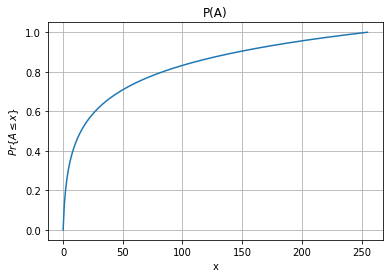

In [33]:
x = np.arange(0,256)
P = 0.125 * np.log2(1+x)

plt.plot(P)
plt.grid()
plt.xlabel('x')
plt.ylabel("$Pr\{A \leq x\}$")
plt.title("P(A)")
plt.show()

#### Calculating J = P(I)

In [34]:
J = np.zeros(I.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        J[i][j] = P[I[i][j]]

#### Applying FSCS on J

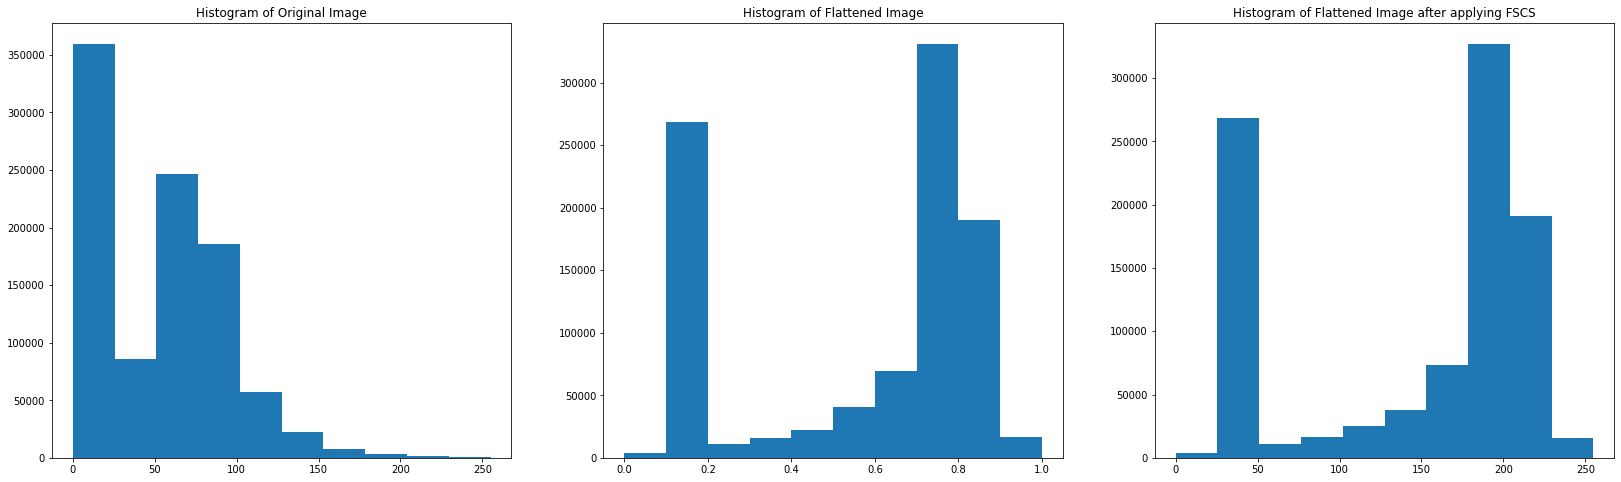

In [35]:
A = np.min(J)
B = np.max(J)
K = 256

P = (K - 1)/(B - A)
L = -A*(K - 1)/(B - A)
FSCS_J = (P*J + A).astype(int)


plt.figure(figsize=(28,8))

plt.subplot(1,3,1)
plt.title('Histogram of Original Image')
plt.hist(I.flatten())

plt.subplot(1,3,2)
plt.title('Histogram of Flattened Image')
plt.hist(J.flatten())

plt.subplot(1,3,3)
plt.hist(FSCS_J.flatten())
plt.title("Histogram of Flattened Image after applying FSCS")

plt.show()

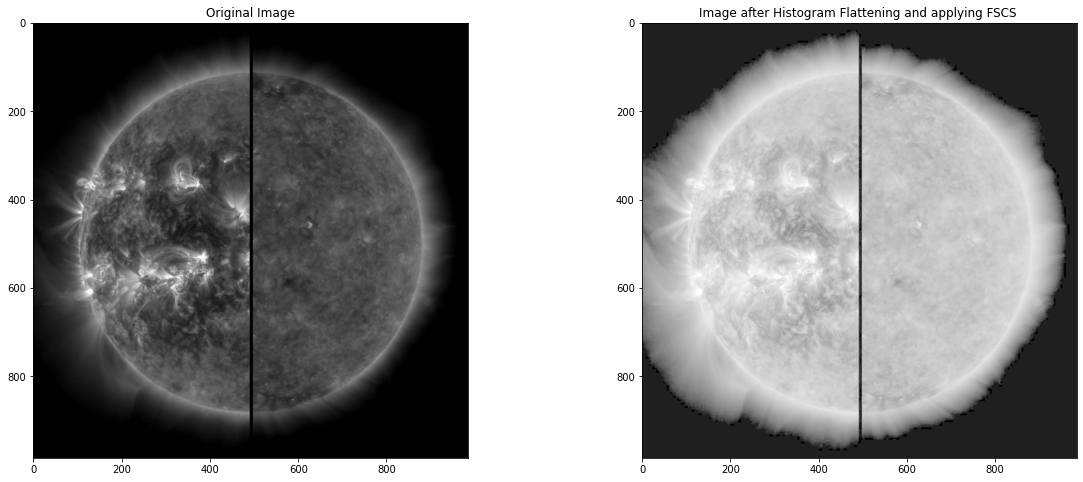

In [36]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(I,cmap='gray',vmin=0,vmax=255)

plt.subplot(1,2,2)
plt.title('Image after Histogram Flattening and applying FSCS ')
plt.imshow(FSCS_J,cmap='gray',vmin=0,vmax=255)

plt.show()

## Zooming

### Reading Image

All Images considered have a Resolution of (512,512,3) but are resize to (256,256,3) for Faster Computation. So, they will be Zoomed to a Resolution of (384,384,3).

Image URLs:
1. [Image-1](https://images.discordapp.net/avatars/353831571910033408/b65fad549554c18001bd3cba95d66ced.png?size=512)
2. [Image-2](https://www.classe.cornell.edu/~seb/celestia/N70.jpg)
3. [Image-3](https://avatarfiles.alphacoders.com/171/171688.jpg)

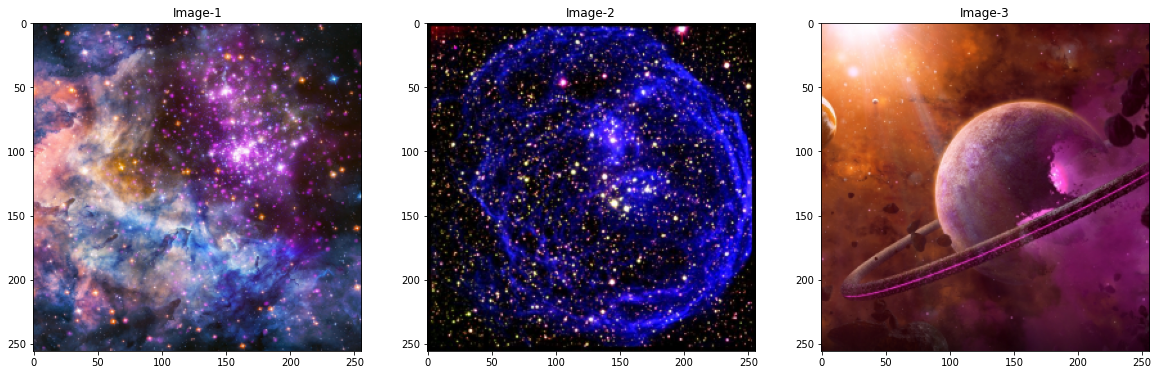

In [37]:
img1 = cv2.resize(cv2.imread('Images/Image-1.png'),(256,256))
img2 = cv2.resize(cv2.imread('Images/Image-2.jpg'),(256,256))
img3 = cv2.resize(cv2.imread('Images/Image-3.jpg'),(256,256))

plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title("Image-1")
plt.imshow(img1)

plt.subplot(1,3,2)
plt.title("Image-2")
plt.imshow(img2)

plt.subplot(1,3,3)
plt.title("Image-3")
plt.imshow(img3)

plt.show()

### Nearest Neighbours

In [38]:
def ZoomNearestNeighbours(img):
    a,b,c = img.shape
    l,m,n = int(1.5*a),int(1.5*b),c
    
    pc = -1 * np.ones((a,1,3)).astype(int)
    pr = -1 * np.ones((1,m,3)).astype(int)
    
    o = np.zeros((a,0,3)).astype(int)
    # Padding Columns
    for j in range(0,b,2):
        o = np.append(o,img[:,j:j+2,:],axis=1)
        o = np.append(o,pc,axis=1)
        
        
    output = np.zeros((0,m,3)).astype(int)
    # Padding Rows
    for i in range(0,a,2):
        output = np.append(output,o[i:i+2,:,:],axis=0)
        output = np.append(output,pr,axis=0)
        
    
    Directions = [(0,-1),(0,1),(-1,0),(1,0)]
    for k in range(n):    
        for i in range(l):
            for j in range(m):
                if output[i][j][k] == -1:
                    possibilities = []
                    for p in Directions:
                        if (i+p[0] >= 0 and i+p[0] < l and j+p[1]>=0 and j+p[1] < m and output[i+p[0]][j+p[1]][k] != -1):
                            possibilities.append(output[i+p[0]][j+p[1]][k])

                    output[i][j][k] = random.choice(possibilities)
        
    return output

ZoomedNNImage1 = ZoomNearestNeighbours(img1)
ZoomedNNImage2 = ZoomNearestNeighbours(img2)
ZoomedNNImage3 = ZoomNearestNeighbours(img3)

#### Plotting Results

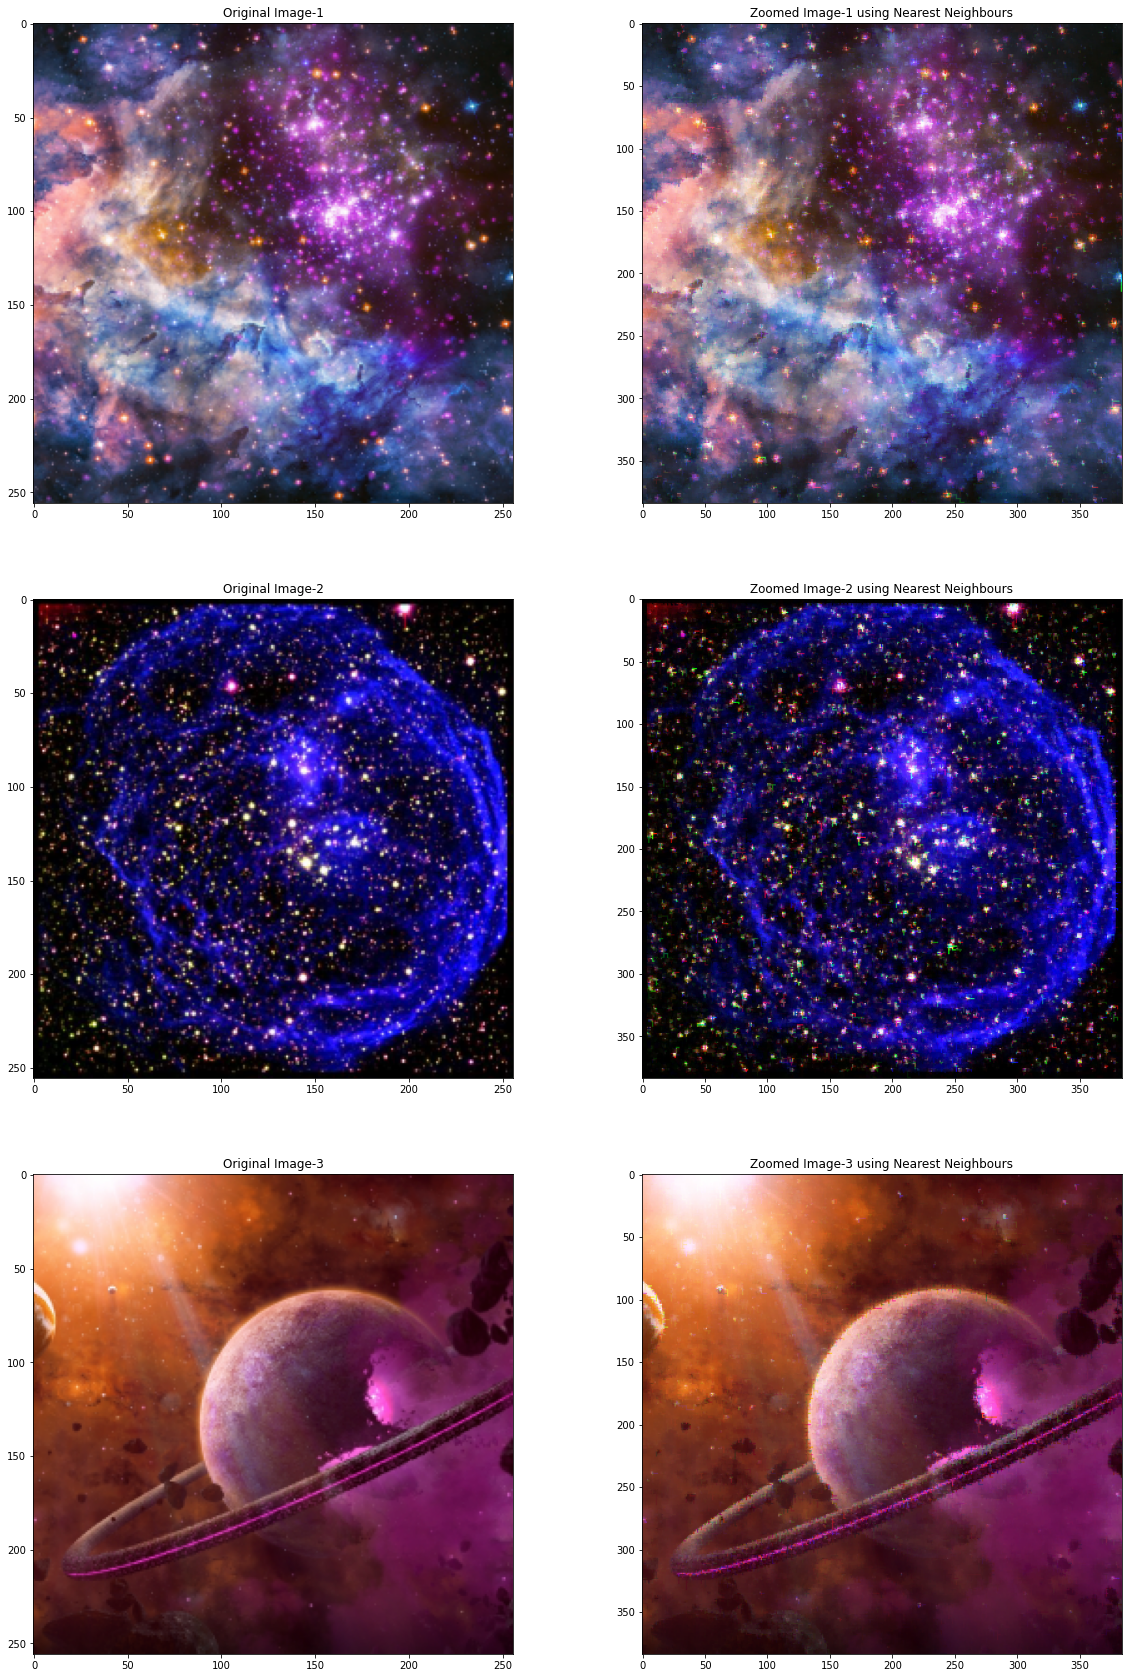

In [39]:
plt.figure(figsize = (20,30))

plt.subplot(3,2,1)
plt.title('Original Image-1')
plt.imshow(img1)
plt.subplot(3,2,2)
plt.title('Zoomed Image-1 using Nearest Neighbours')
plt.imshow(ZoomedNNImage1)

plt.subplot(3,2,3)
plt.title('Original Image-2')
plt.imshow(img2)
plt.subplot(3,2,4)
plt.title('Zoomed Image-2 using Nearest Neighbours')
plt.imshow(ZoomedNNImage2)


plt.subplot(3,2,5)
plt.title('Original Image-3')
plt.imshow(img3)
plt.subplot(3,2,6)
plt.title('Zoomed Image-3 using Nearest Neighbours')
plt.imshow(ZoomedNNImage3)

plt.show()

### Bilinear Interpolation

**Assumption:** We will consider all the 24 Pixels around a pixel while considering them in Minimum Distance Order and the Pixel shouls also belong to Original Image.

**Format:** \
1 1 1 1 1 \
1 1 1 1 1 \
1 1 A 1 1 \
1 1 1 1 1 \
1 1 1 1 1

Ones indicate the Pixels around 'A' considered for Calculation 

In [40]:
def ZoomBilinearInterpolation(img):
    a,b,c = img.shape
    l,m,n = int(1.5*a),int(1.5*b),c
    
    pc = -1 * np.ones((a,1,3)).astype(int)
    pr = -1 * np.ones((1,m,3)).astype(int)
    
    o = np.zeros((a,0,3)).astype(int)
    # Padding Columns
    for j in range(0,b,2):
        o = np.append(o,img[:,j:j+2,:],axis=1)
        o = np.append(o,pc,axis=1)
        
        
    output = np.zeros((0,m,3)).astype(int)
    # Padding Rows
    for i in range(0,a,2):
        output = np.append(output,o[i:i+2,:,:],axis=0)
        output = np.append(output,pr,axis=0)
        
    Locations = np.where(output>=0, 1, 0)
        
    # Taken in Order of Minimum Distance
    Directions = [(1,0),(0,-1),(-1,0),(0,1),(1,1),(1,-1),(-1,-1),(-1,1),(2,0),(0,-2),(-2,0),(0,2),(2,1),(2,-1),(1,-2),(-1,-2),(-2,-1),(-2,1),(-1,2),(1,2),(-2,-2),(-2,2),(2,-2),(2,2)]
    
    for k in range(n):    
        for i in range(l):
            for j in range(m):
                if output[i][j][k] == -1:
                    count = 0
                    M = np.ones((4,4)).astype(int)
                    V = np.zeros((4,1)).astype(int)
                    for p in Directions:
                        if (i+p[0] >= 0 and i+p[0] < l and j+p[1]>=0 and j+p[1] < m and Locations[i+p[0]][j+p[1]][k] == 1):
                            M[count][1] = i+p[0]
                            M[count][2] = j+p[1]
                            M[count][3] = (i+p[0]) * (j+p[1])
                            V[count][0] = output[i+p[0]][j+p[1]][k]
                            count += 1
                            
                        if count == 4:
                            break
                            
                    if count != 4:
                        print (i,j,k)
                        
                    if np.linalg.det(M) != 0:
                        Parameter = np.matmul(np.linalg.inv(M),V)
                    else:
                        Parameter = np.matmul(np.linalg.pinv(M),V)

                    # Clippign Values between 0 and 255
                    output[i][j][k] = min(255,max(0,Parameter[0] + i*Parameter[1] + j*Parameter[2] + i*j*Parameter[3]))
    
    return output.astype(int)    
    
ZoomedBIImage1 = ZoomBilinearInterpolation(img1)
ZoomedBIImage2 = ZoomBilinearInterpolation(img2)
ZoomedBIImage3 = ZoomBilinearInterpolation(img3)

#### Results

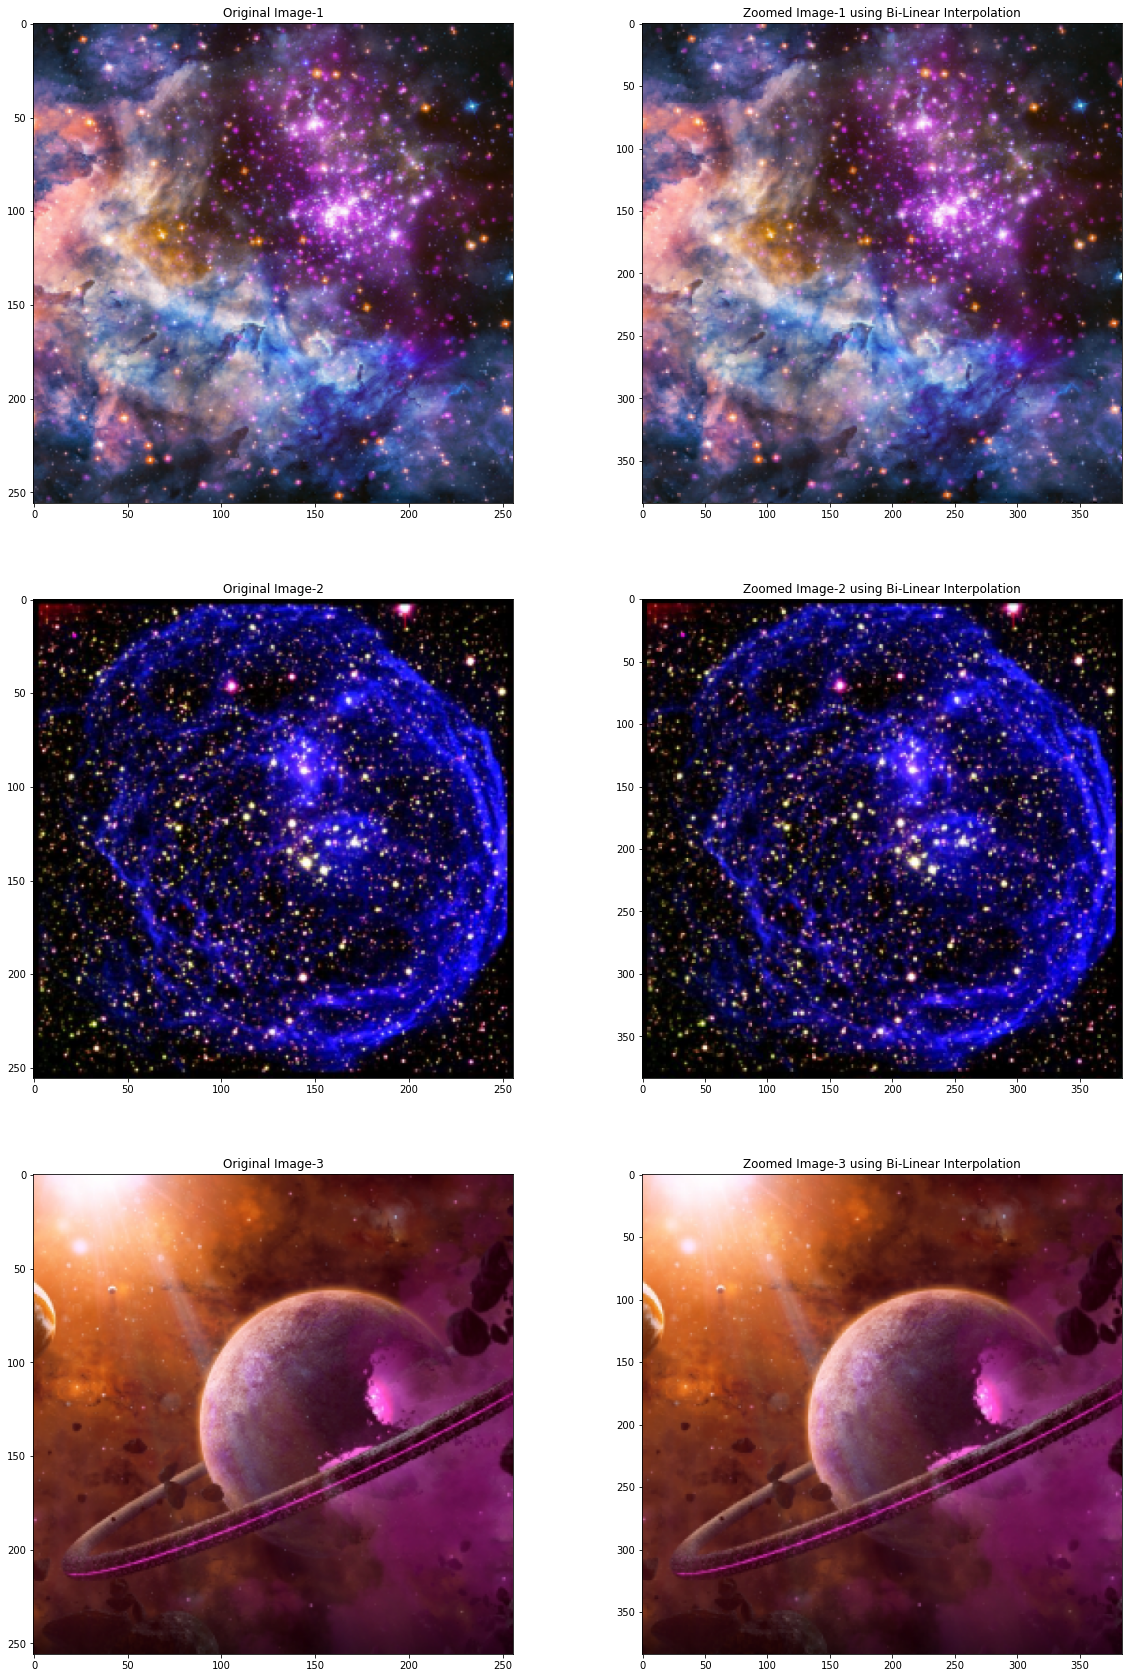

In [41]:
plt.figure(figsize = (20,30))

plt.subplot(3,2,1)
plt.title('Original Image-1')
plt.imshow(img1)
plt.subplot(3,2,2)
plt.title('Zoomed Image-1 using Bi-Linear Interpolation')
plt.imshow(ZoomedBIImage1)

plt.subplot(3,2,3)
plt.title('Original Image-2')
plt.imshow(img2)
plt.subplot(3,2,4)
plt.title('Zoomed Image-2 using Bi-Linear Interpolation')
plt.imshow(ZoomedBIImage2)


plt.subplot(3,2,5)
plt.title('Original Image-3')
plt.imshow(img3)
plt.subplot(3,2,6)
plt.title('Zoomed Image-3 using Bi-Linear Interpolation')
plt.imshow(ZoomedBIImage3)

plt.show()

It can be observed that Zoomed Images formed by Bi-Linear Interpolation are more accurate than Zoomed Images formed by Nearest Neighbours